In [1]:
! jupyter nbconvert --to pdf student.ipynb  

[NbConvertApp] Converting notebook student.ipynb to pdf
Traceback (most recent call last):
  File "C:\Users\joyle\anaconda3\envs\learn-env\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\joyle\anaconda3\envs\learn-env\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\joyle\anaconda3\envs\learn-env\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\joyle\anaconda3\envs\learn-env\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\joyle\anaconda3\envs\learn-env\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\joyle\anaconda3\envs\learn-env\lib\site-packages\nbconvert\nbconvertapp.py", line 489, in convert_single

## Final Project Submission

Please fill out:
* Student name: Joyleen Cherono
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 7th November 2023
* Blog post URL: https://github.com/jcrotich/phase1_project


In [68]:
# import packages 
import pandas as pd 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
#load the csv files into pandas dataframes
df_ratings=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_basics=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

### Explore ratings dataframe

In [6]:
#first 2 rows
df_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [8]:
# number of rows and columns
print(f"Ratings file has {df_ratings.shape[0]} rows and {df_ratings.shape[1]} columns.")

Ratings file has 73856 rows and 3 columns.


In [9]:
#data types
df_ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [10]:
#missing records in ratings dataframe
df_ratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

 - There are no missing records in ratings file

### Explore basics dataframe

In [22]:
#first two rows
df_basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [12]:
# number of records in basics file
print(f"Basics file has {df_basics.shape[0]} rows and {df_basics.shape[1]} columns.")

Basics file has 146144 rows and 6 columns.


In [15]:
#missing records in basics file
df_basics.isnull().sum()/df_basics.shape[0]*100

tconst              0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

- runtime_minutes column has 21.7% missing records.
- 3.7% of records miss genres info.

### Explore gross file

In [16]:
# first two rows
df_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [17]:
#number of records in gross file
print(f"Gross file has {df_gross.shape[0]} rows and {df_gross.shape[1]} columns.")

Gross file has 3387 rows and 5 columns.


In [20]:
#number of missing records
df_gross.isnull().sum()/df_gross.shape[0]*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

- foreign_gross column has 39.8% missing records. 

#### Merge the three sets together

In [28]:
#first merge basics and ratings files
data_ = df_basics.merge(df_ratings,how='inner', on='tconst')
#then merge with gross file
data=data_.merge(df_gross,how='inner', left_on='primary_title',right_on='title')
#view the first two records
data.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012


In [42]:
data['main_genre'] = data.genres.str.split(',').str[0]

In [31]:
# number of records
print(f"Merged file has {data.shape[0]} rows and {data.shape[1]} columns.")

Merged file has 3027 rows and 13 columns.


In [50]:
#data types
data.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
main_genre          object
dtype: object

In [56]:
#convert foreign_gross column to numeric data type, first we remove , from values
data.foreign_gross = data.foreign_gross.str.replace(',','')
data.foreign_gross = pd.to_numeric(data.foreign_gross)

In [34]:
# missing records
data.isnull().sum()/data.shape[0]*100

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes     1.552692
genres              0.231252
averagerating       0.000000
numvotes            0.000000
title               0.000000
studio              0.099108
domestic_gross      0.726792
foreign_gross      39.478031
year                0.000000
dtype: float64

In [49]:
data.foreign_gross.head()

0          NaN
1      8000000
2      8000000
3      8000000
4    129900000
Name: foreign_gross, dtype: object

In [59]:
# view domestic revenue per genre
data.groupby('main_genre').domestic_gross.mean().sort_values(ascending=False)

main_genre
Sci-Fi        206339000.00
Family         74367800.00
Adventure      72949390.13
Action         59453505.93
Fantasy        36820853.85
Mystery        34423700.00
Horror         32867244.95
Animation      28954575.00
Comedy         19815406.19
Biography      19662951.78
Thriller       19366057.69
Crime          17272307.97
Documentary    15115806.99
Drama          12243930.91
Romance         7245255.56
Sport           5300000.00
Music           3400000.00
Name: domestic_gross, dtype: float64

- From the above, Sci Fi genre generates the most domestic gross

### view foreign revenue per genre


In [ ]:
data.

In [60]:
data.groupby('main_genre').foreign_gross.mean().sort_values(ascending=False)

main_genre
Sci-Fi        409300000.00
Adventure     170089320.11
Action        145366903.32
Family        137550000.00
Fantasy       110444444.44
Animation      95713826.04
Mystery        59271428.43
Horror         56150003.75
Thriller       53164450.00
Romance        40155250.00
Biography      40023336.23
Documentary    37150965.28
Comedy         32552011.20
Drama          32491679.67
Crime          31102086.73
Music           4600000.00
Sport                  nan
Name: foreign_gross, dtype: float64

-Also, the Sci Fi genre generates the most Foreign gross compared to the rest of the genres. Music and Sport generate the list foreign and domestic gross.

In [61]:
# view number of votes per genre
data.groupby('main_genre').numvotes.mean().sort_values(ascending=False)

main_genre
Mystery       202139.30
Action        121994.90
Adventure      99720.23
Crime          61605.36
Biography      57793.11
Horror         55802.26
Comedy         42527.83
Animation      42361.56
Drama          33834.26
Romance        29307.78
Fantasy        16881.92
Music          15592.00
Documentary     4131.91
Thriller        1999.04
Sci-Fi          1760.50
Sport             77.00
Family            36.00
Name: numvotes, dtype: float64

mystery genre has the most average number of votes compared to the other genres. This has the most number of views also.

In [62]:
data.studio.head()

0    Relbig.
1        IFC
2        IFC
3        IFC
4        Fox
Name: studio, dtype: object

In [63]:
# view number of votes per genre
data.groupby('main_genre').runtime_minutes.mean().sort_values(ascending=False)

main_genre
Action        115.50
Sport         114.00
Crime         111.78
Biography     111.63
Mystery       111.50
Romance       110.62
Drama         107.59
Fantasy       106.62
Comedy        105.41
Adventure     103.47
Thriller       97.17
Animation      95.40
Horror         93.94
Music          93.00
Documentary    87.38
Family         80.33
Sci-Fi         74.50
Name: runtime_minutes, dtype: float64

Action has the most number of run time minutes , while Sci Fi genres are seen to have the least average run time.

In [64]:
# view average domestic revenue per studio
data.groupby('studio').domestic_gross.mean().sort_values(ascending=False)

studio
BV            175240206.18
P/DW          168290000.00
WB             89799159.66
Uni.           88406397.44
WB (NL)        83983333.31
MGM            83000000.00
Par.           82253474.43
Sony           79444971.56
Fox            79386231.87
Sum.           48820611.11
SGem           45471875.00
TriS           44390909.09
LG/S           41716216.19
LGF            41148337.78
Studio 8       32925000.00
Rela.          31619161.29
STX            30547826.09
FD             25020400.00
ORF            21346153.85
CBS            21307692.31
W/Dim.         20708770.00
Wein.          20666409.83
GrtIndia       20200000.00
Focus          19739354.84
Annapurna      19142857.14
ENTMP          17350000.00
FoxS           15179629.87
PFR            13000000.00
CE             11850000.00
Affirm         11700000.00
Imax           11550000.00
Global Road    11400000.00
Over.          11240333.33
Neon           11077000.00
BH Tilt         9500000.00
Free            7643687.50
Mira.           71585

for any movie produced, BV and P/DW studio have generated the most amount of domestic gross value.

In [65]:
# number of movies per studio
data.groupby('studio').size().sort_values(ascending=False)

studio
Uni.           156
IFC            145
Fox            138
WB             119
Magn.          117
SPC            110
BV              97
LGF             91
Par.            90
Sony            89
Wein.           81
FoxS            79
Eros            76
RAtt.           68
Focus           62
WB (NL)         54
Strand          54
KL              53
WGUSA           49
MBox            48
UTV             48
A24             45
CJ              44
CL              43
FM              39
ORF             39
LG/S            37
Cohen           36
SGem            32
Rela.           31
STX             23
Osci.           22
TriS            22
RTWC            21
Drft.           21
EOne            21
BG              21
BST             20
Gold.           20
MNE             20
FIP             19
Sum.            18
GK              17
Relbig.         16
Zeit.           16
Trib.           16
Orch.           14
VE              14
CGld            13
Yash            13
CBS             13
Anch.           13
W/Dim

- most producers prefer to partner with the Uni, iFC and Fox studios.

In [67]:
# view average ratings per genre
data.groupby('main_genre').averagerating.mean().sort_values(ascending=False)

main_genre
Sport         7.90
Documentary   7.24
Music         7.20
Biography     6.97
Mystery       6.80
Animation     6.79
Crime         6.66
Drama         6.56
Adventure     6.53
Action        6.28
Comedy        6.25
Fantasy       6.12
Family        6.06
Romance       6.06
Thriller      5.76
Horror        5.43
Sci-Fi        5.05
Name: averagerating, dtype: float64

- sports has the highest average ratings from the viewers. The least average ratings are from the Sci Fi genre.

In [89]:
# view average run time per genre
data.groupby('main_genre').runtime_minutes.mean().sort_values(ascending=False)

main_genre
Action        115.50
Sport         114.00
Crime         111.78
Biography     111.63
Mystery       111.50
Romance       110.62
Drama         107.59
Fantasy       106.62
Comedy        105.41
Adventure     103.47
Thriller       97.17
Animation      95.40
Horror         93.94
Music          93.00
Documentary    87.38
Family         80.33
Sci-Fi         74.50
Name: runtime_minutes, dtype: float64

<AxesSubplot:xlabel='averagerating', ylabel='Count'>

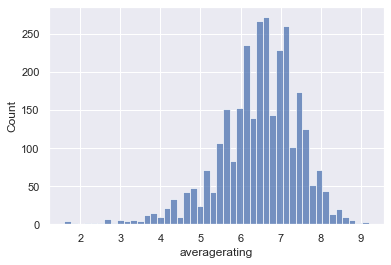

In [74]:
# distribution of average rating.
sns.histplot(data, x="averagerating")

<AxesSubplot:xlabel='foreign_gross', ylabel='domestic_gross'>

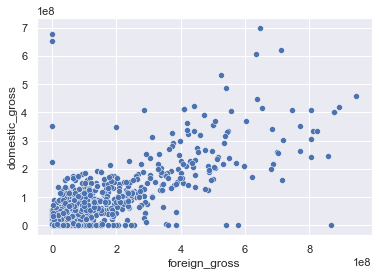

In [83]:
sns.scatterplot(data = data, x="foreign_gross", y="domestic_gross")

- most movies generate the same revenue domestic and foreign.

<AxesSubplot:xlabel='domestic_gross', ylabel='averagerating'>

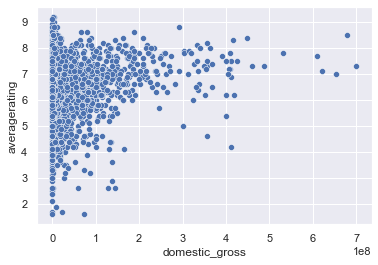

In [85]:
sns.scatterplot(data = data, y="averagerating", x="domestic_gross")

- there is no direct relationship between rating and revenue. Hence, higher ratings do not translate to high revenue.

<AxesSubplot:xlabel='numvotes', ylabel='domestic_gross'>

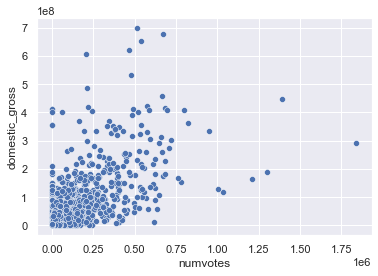

In [87]:
sns.scatterplot(data = data, x="numvotes", y="domestic_gross")

- there is also no direct relationship between number of votes and domestic gross.

<AxesSubplot:xlabel='year', ylabel='domestic_gross'>

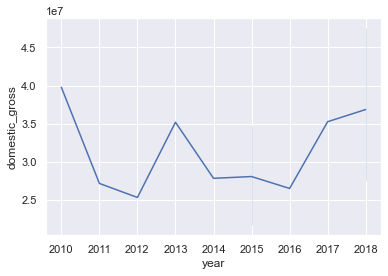

In [88]:
sns.lineplot(data= data, x="year", y="domestic_gross")

- domestic gross revenue had a deep decline from 2010 to 2012, and then seemed to have peaked in 2013, then flatened between 2014 and 2016, it then increased from 2016 to 2018. 

### Recommendations
- I would recommend Microsoft to start with Sci Fi movie with an average run time of 75 minutes, and partner with BV studio to capitalize on revenue.
